# One dimensional Neural Network

In [31]:
from neuralnetwork.datasets import blobs, nregion, circle
from neuralnetwork import Network

Layer: L0, Neurons: 1, Activation: None, Weights: (0, 0), Biases: (0, 0)
Layer: L1, Neurons: 5, Activation: absolute, Weights: (5, 1), Biases: (5, 1)
Layer: L2, Neurons: 5, Activation: relu, Weights: (5, 5), Biases: (5, 1)
Layer: L3, Neurons: 1, Activation: sigmoid, Weights: (1, 5), Biases: (1, 1)


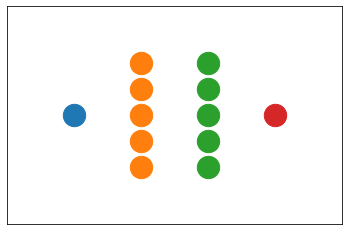

In [73]:
# Example Network
mynetwork = Network(1)
mynetwork.add_layer(5, activation = 'absolute' )
mynetwork.add_layer(5, activation = 'relu')
mynetwork.add_layer(1, activation = 'sigmoid')
mynetwork.summary()

# Simple Prediction

# Load Dataset

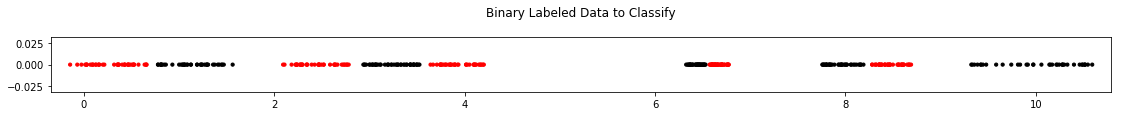

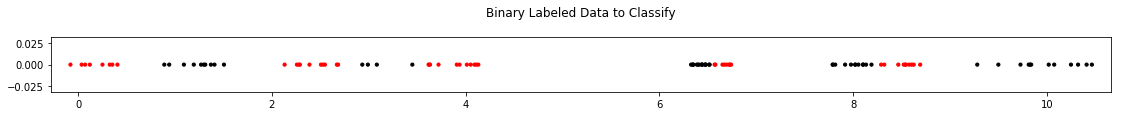

In [74]:
X_train, Y_train, X_val, Y_val, C, R = nregion.load_random_regions(regions=10, validation = 0.20, points=50)
nregion.graph(X_train, Y_train, size = 10)
nregion.graph(X_val, Y_val, size = 10)

In [75]:
len(C)

5

# N region initialization

In [76]:
import numpy as np

In [96]:
# Change the slopes of first layer to 1
mynetwork.layers['L1']['weights'] = np.ones_like(mynetwork.layers['L1']['weights'])
mynetwork.layers['L1']['weights']

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [97]:
# Change the biases to the list of centers
mynetwork.layers['L1']['biases'] = -np.array(C).reshape(mynetwork.layers['L1']['biases'].shape)
mynetwork.layers['L1']['biases']

array([[-1.17212083],
       [-3.23259557],
       [-6.43513031],
       [-7.96798701],
       [-9.9377552 ]])

In [98]:
mynetwork.layers['L2']['weights'].shape[0]

5

In [116]:
mynetwork.layers['L2']['weights'] = -np.identity(mynetwork.layers['L2']['weights'].shape[0], dtype=None)
mynetwork.layers['L2']['weights']

array([[-1., -0., -0., -0., -0.],
       [-0., -1., -0., -0., -0.],
       [-0., -0., -1., -0., -0.],
       [-0., -0., -0., -1., -0.],
       [-0., -0., -0., -0., -1.]])

In [108]:
mynetwork.layers['L2']['biases'] = np.array(R).reshape(mynetwork.layers['L2']['biases'].shape)+min(R)
mynetwork.layers['L2']['biases']

array([[0.51878961],
       [0.42308709],
       [0.21808518],
       [0.33464915],
       [0.76983171]])

In [109]:
mynetwork.layers['L3']['weights'] = np.ones_like(mynetwork.layers['L3']['weights'])
mynetwork.layers['L3']['weights']

array([[1., 1., 1., 1., 1.]])

In [110]:
mynetwork.layers['L3']['biases'] = -min(R)
mynetwork.layers['L3']['biases']

-0.10904258835258877

# Graph the decision boundary

In [111]:
def prediction(x):
    return mynetwork.predict(x)-0.5

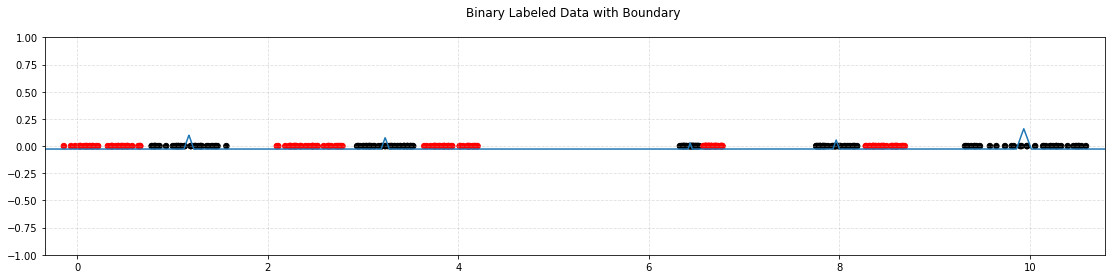

In [112]:
# Graph Decision Boundary
nregion.graph(X_train, Y_train, decision = prediction)

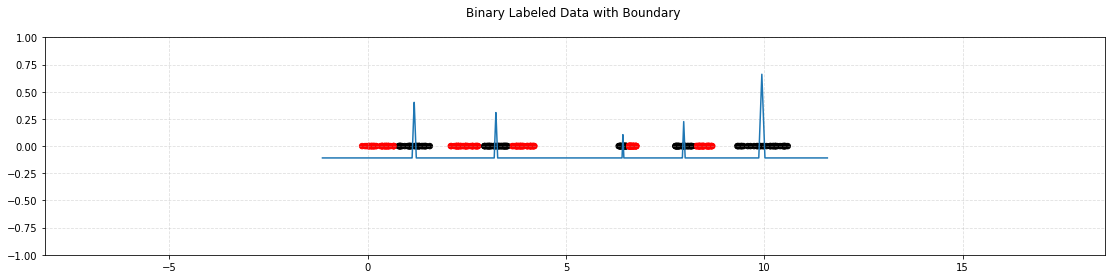

In [113]:
# Graph Decision Boundary|
nregion.graph(X_train, Y_train, decision = mynetwork.decision, padding=8)

In [114]:
mynetwork.accuracy(X_train,Y_train)

0.5575

In [10]:
mynetwork.train_biases_only()

# Backward pass illusrated

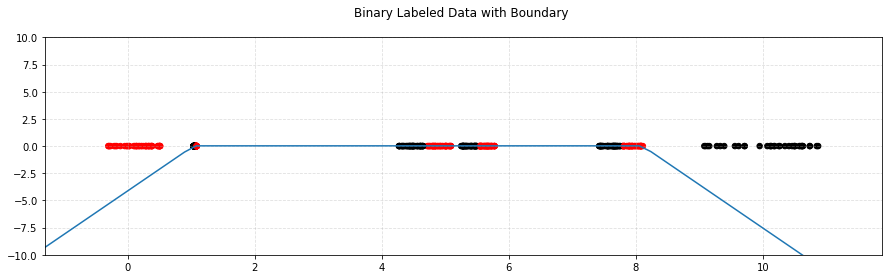

loss: 1.279 acc:  52% val_loss: 1.583 val_acc:  45%


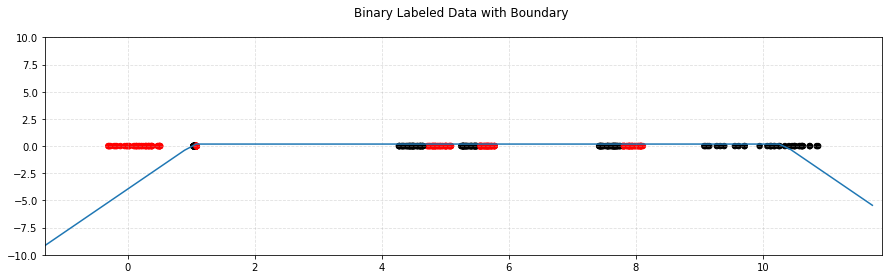

loss: 0.648 acc:  56% val_loss: 0.660 val_acc:  56%


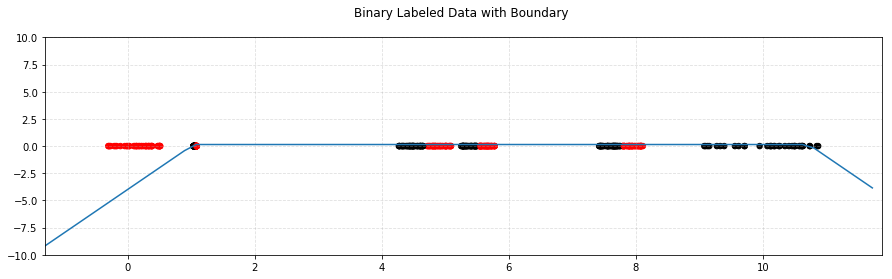

loss: 0.621 acc:  60% val_loss: 0.644 val_acc:  59%


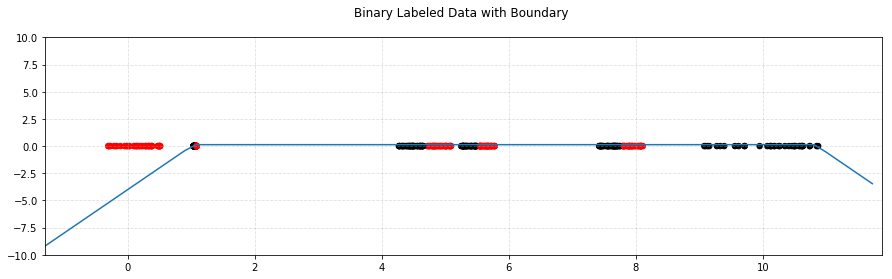

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


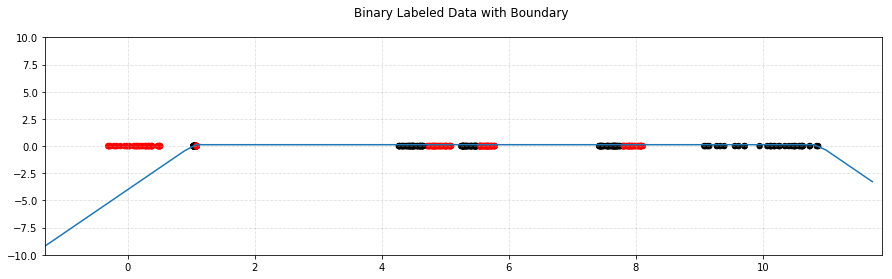

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


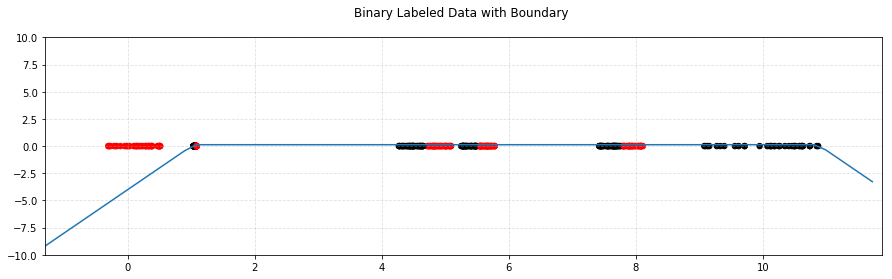

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


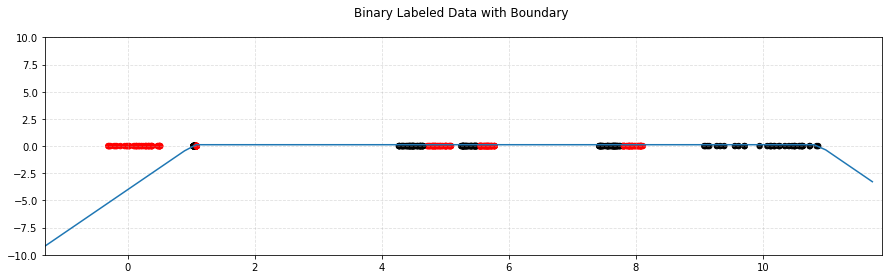

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


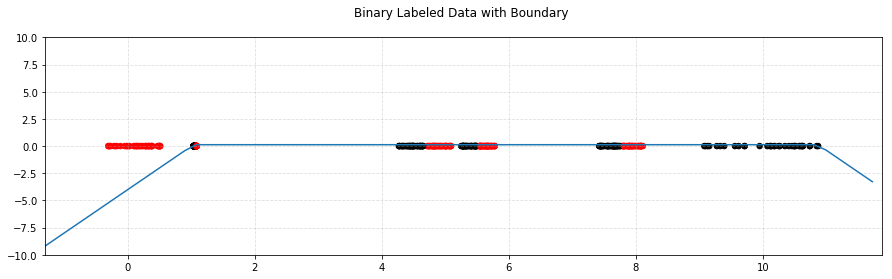

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


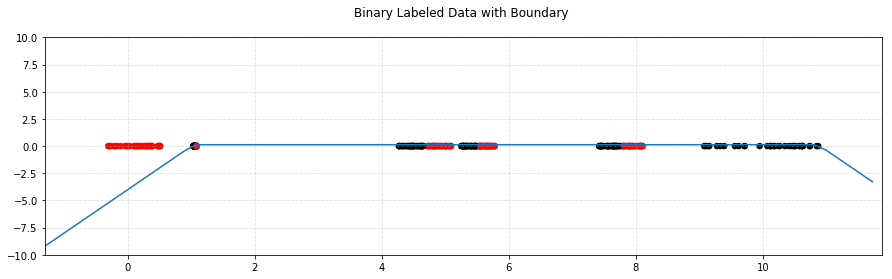

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


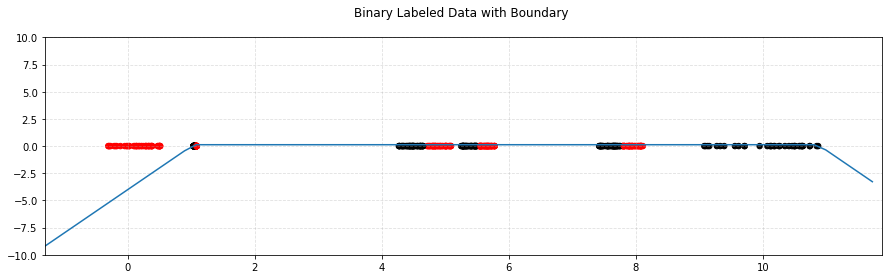

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


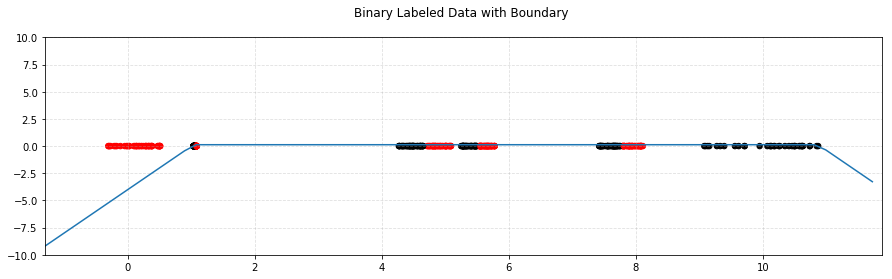

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


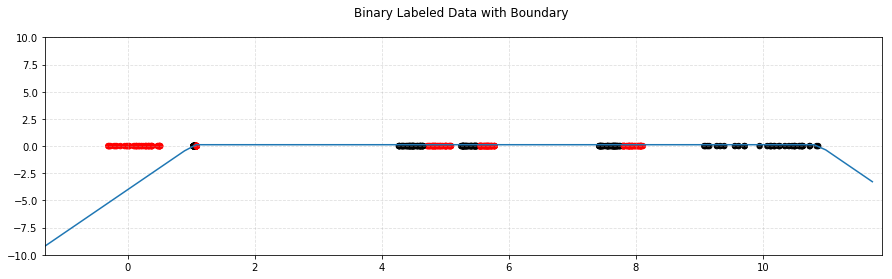

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


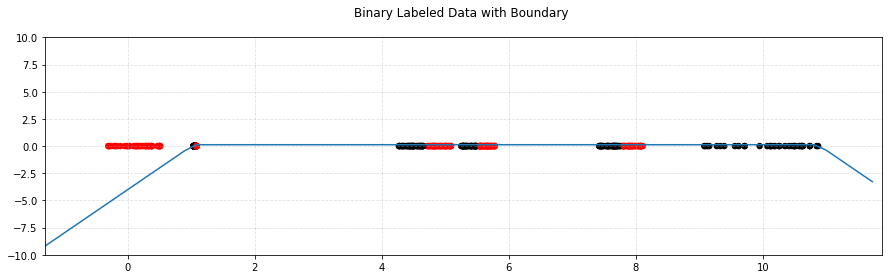

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


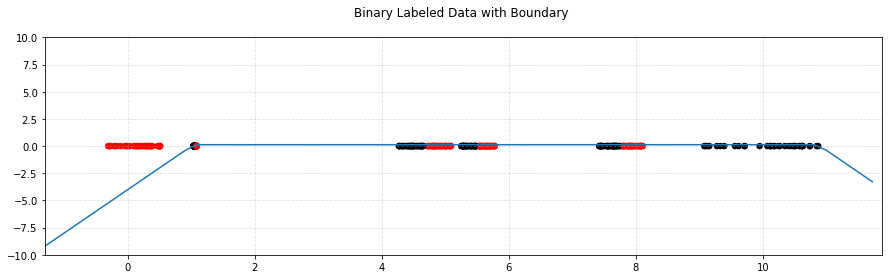

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


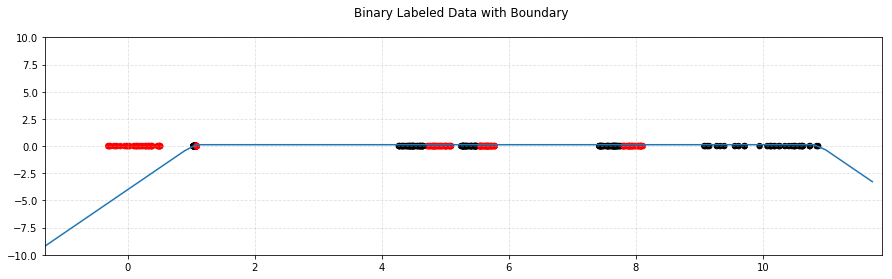

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


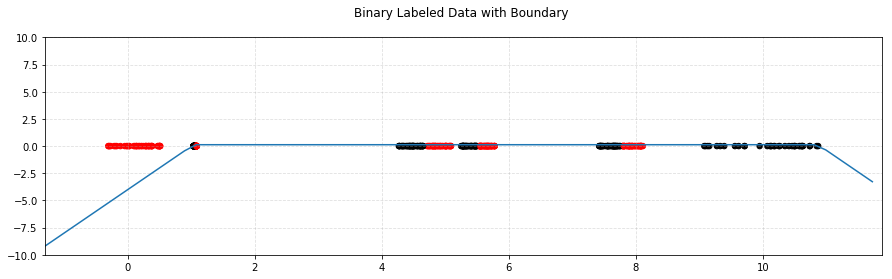

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


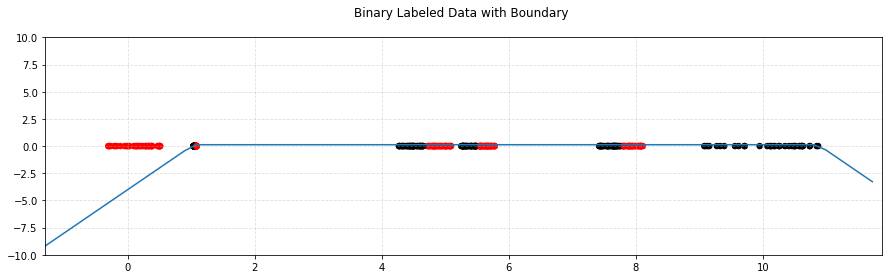

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


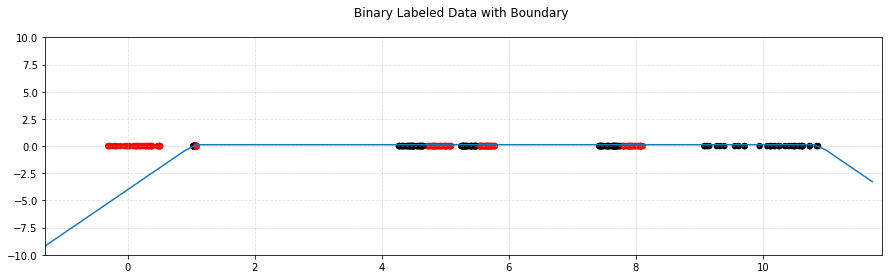

loss: 0.620 acc:  60% val_loss: 0.644 val_acc:  59%


KeyboardInterrupt: 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
decision = mynetwork.decision
learning_rate = 0.001
for n in range(100):
    #mynetwork.train_mini_batch(X_train, Y_train, learning_rate=0.01, num_epochs=100, batch_size=X_train.shape[0], validation_data = (X_val,Y_val),verbose=False)
    mynetwork.train_mini_batch(X_train, Y_train, learning_rate=learning_rate, num_epochs=1000, batch_size=64, validation_data = (X_val,Y_val),verbose=False)
    plt.figure(figsize=(15,4))
    plt.scatter(X_train[:,0], np.zeros(X_train[:,0].shape), c=Y_train, cmap='flag', s = 30)
    plt.grid(alpha=.4,linestyle='--')
    X_line = np.arange(min(X_train[:,0])-1, max(X_train[:,0])+1, (max(X_train[:,0])-1 - min(X_train[:,0])-1)/50)
    X_line_reshape = X_line.reshape(X_line.shape[0],1)
    Y_line = [decision(X_line_reshape[i])[0][0] for i in range(len(X_line_reshape))]
    plt.plot(X_line, Y_line)
    plt.title('Binary Labeled Data with Boundary \n')
    plt.ylim(-10,10)
    plt.xlim(min(X_train[:,0])-1, max(X_train[:,0])+1)
    x = np.array(range(100))
    plt.show()
    plt.close()
    loss = mynetwork.binary_crossentropy_loss(X_train,Y_train)
    acc = mynetwork.accuracy(X_train,Y_train)
    val_loss = mynetwork.binary_crossentropy_loss(X_val,Y_val)
    val_acc = mynetwork.accuracy(X_val,Y_val)
    print(f"loss: {loss:.3f} acc: {acc: 0.0%} val_loss: {val_loss:.3f} val_acc: {val_acc: 0.0%}")